In [3]:
import pandas as pd
import boto3
import io
import matplotlib.pyplot as plt


bucket = "ia340-2025-fall-86749173517"
file_key = "Crime_Data_from_2020_to_Present.csv"  

s3 = boto3.client("s3")
obj = s3.get_object(Bucket=bucket, Key=file_key)
df = pd.read_csv(io.BytesIO(obj["Body"].read()))

print("Loaded dataset from S3")
display(df.head())

Loaded dataset from S3


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Research Question: To analyze the frequency and distribution of crime in the LA area from 2020-2025.

### Dataset: This dataset explores criminal reports in the LA area from 2020-2025. This includes the ID, date reported, date occured, time occured, area, area name, crime ID, crime description, status description, location, longitude, and latitude. My reason for choosing this dataset is it matches my interest in criminal justice.
### Source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present 

In [7]:

print("\n--- INFO ---")
print(df.info())

print("\n--- DESCRIBE ---")
display(df.describe(include='all'))

missing_before = df.isna().sum()
df = df.dropna()   
missing_after = df.isna().sum()

print("\n--- Missing Value Report ---")
print("Before:\n", missing_before)
print("After:\n", missing_after)

dupes_before = df.duplicated().sum()
df = df.drop_duplicates()
dupes_after = df.duplicated().sum()

print(f"\nDuplicates before: {dupes_before} | after: {dupes_after}")

if 'DATE OCC' in df.columns:
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 27751 to 934749
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           10 non-null     int64         
 1   Date Rptd       10 non-null     object        
 2   DATE OCC        10 non-null     datetime64[ns]
 3   TIME OCC        10 non-null     int64         
 4   AREA            10 non-null     int64         
 5   AREA NAME       10 non-null     object        
 6   Rpt Dist No     10 non-null     int64         
 7   Part 1-2        10 non-null     int64         
 8   Crm Cd          10 non-null     int64         
 9   Crm Cd Desc     10 non-null     object        
 10  Mocodes         10 non-null     object        
 11  Vict Age        10 non-null     int64         
 12  Vict Sex        10 non-null     object        
 13  Vict Descent    10 non-null     object        
 14  Premis Cd       10 non-null     float64    

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
count,1.000000e+01,10,10,10.000000,10.000000,10,10.000000,10.000000,10.000000,10,...,10,10,10.000000,10.000000,10.000000,10.0,10,10,10.000000,10.000000
unique,NaN,10,NaN,NaN,NaN,5,NaN,NaN,NaN,7,...,3,3,NaN,NaN,NaN,NaN,10,10,NaN,NaN
top,NaN,01/02/2020 12:00:00 AM,NaN,NaN,NaN,Mission,NaN,NaN,NaN,ROBBERY,...,IC,Invest Cont,NaN,NaN,NaN,NaN,ASTORIA ST,SAN FERNANDO RD,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,3,NaN,NaN,NaN,3,...,4,4,NaN,NaN,NaN,NaN,1,1,NaN,NaN
mean,2.192602e+08,NaN,2022-05-12 12:00:00,1341.300000,12.500000,NaN,1303.700000,1.100000,494.600000,NaN,...,NaN,NaN,419.800000,578.100000,890.900000,998.0,NaN,NaN,34.164540,-118.402450
min,2.006134e+08,NaN,2020-01-01 00:00:00,1.000000,2.000000,NaN,279.000000,1.000000,121.000000,NaN,...,NaN,NaN,121.000000,210.000000,761.000000,998.0,NaN,NaN,33.979200,-118.493900
25%,2.103112e+08,NaN,2021-06-15 00:00:00,575.000000,6.000000,NaN,657.500000,1.000000,210.000000,NaN,...,NaN,NaN,210.000000,235.000000,910.000000,998.0,NaN,NaN,34.090525,-118.465775
50%,2.210010e+08,NaN,2022-08-01 12:00:00,1550.000000,15.500000,NaN,1595.000000,1.000000,485.500000,NaN,...,NaN,NaN,220.000000,665.000000,910.000000,998.0,NaN,NaN,34.163950,-118.451900
75%,2.292178e+08,NaN,2023-08-07 00:00:00,2095.250000,18.500000,NaN,1875.750000,1.000000,805.250000,NaN,...,NaN,NaN,761.000000,850.250000,910.000000,998.0,NaN,NaN,34.259025,-118.315975
max,2.419053e+08,NaN,2024-02-03 00:00:00,2300.000000,19.000000,NaN,1983.000000,2.000000,910.000000,NaN,...,NaN,NaN,812.000000,930.000000,997.000000,998.0,NaN,NaN,34.310300,-118.272000



--- Missing Value Report ---
Before:
 DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64
After:
 DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0


,Crime Type,Count
0,ROBBERY,3
1,BRANDISH WEAPON,2
2,"RAPE, FORCIBLE",1
3,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,1
4,"RAPE, ATTEMPTED",1



--- Filtered BURGLARY Incidents ---


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


### Cleaning: To clean the data I dropped missing values, dropped duplicate values, and changed date occurred to a datetime value to make analysis easier.

In [8]:
crime_counts = df['Crm Cd Desc'].value_counts().reset_index()
crime_counts.columns = ['Crime Type', 'Count']

print("\n--- Crime Frequency Table ---")
display(crime_counts.head())


--- Crime Frequency Table ---


,Crime Type,Count
0,ROBBERY,3
1,BRANDISH WEAPON,2
2,"RAPE, FORCIBLE",1
3,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,1
4,"RAPE, ATTEMPTED",1


### Aggregate: For this I categorized Crime type and had it display the count of each tyep in totla for the dataset. This helps me analyze the most prevelant type of crime in LA as well as mroe accurately assess the crime description column.

In [9]:
burglary_df = df[df['Crm Cd Desc'].str.contains("BURGLARY", case=False, na=False)]

print("\n--- Filtered BURGLARY Incidents ---")
display(burglary_df.head())


--- Filtered BURGLARY Incidents ---


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


### Query: I filtered the data to only the Buglar incidents within LA.

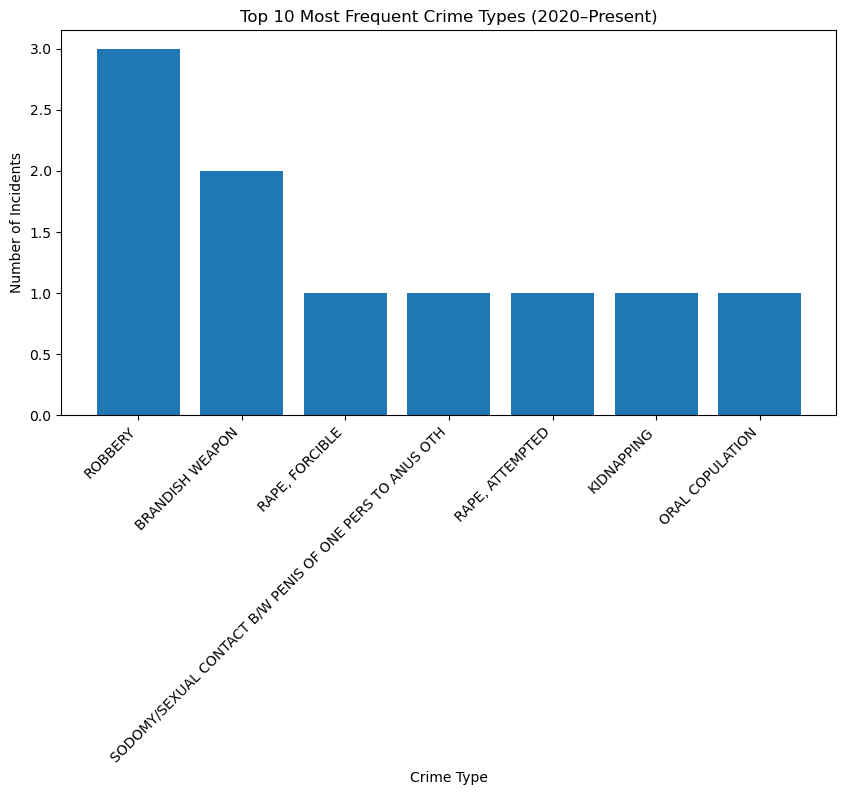

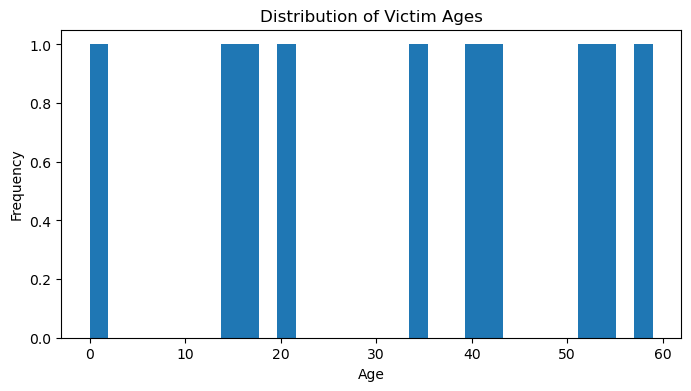

In [6]:
# 1) Bar Chart of Top 10 Crime Types
top10 = crime_counts.head(10)
plt.figure(figsize=(10,5))
plt.bar(top10['Crime Type'], top10['Count'])
plt.title("Top 10 Most Frequent Crime Types (2020–Present)")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.show()

# 2) Histogram of Victim Age (if available)
if 'Vict Age' in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df['Vict Age'], bins=30)
    plt.title("Distribution of Victim Ages")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

### Analysis/Results: The visualizations above show first that the most prominent crimes in the LA area are robbery, brandishing a weapon in public, adn rape. While the distribution shows that in total crimes mainly occur in the middle teenage years (15-18, 20-21) and middle age of adults (40-43, 50-53). With the smallest number of crimes occuring from ages 0-3 and 33-35.

### Conclusions: Using this data I can conclude that robbery is the most prevelant crimes taking place in LA mainly from teenagers and middle adulthood. This could imply living in LA requires extensive home security systems and the government of LA should focus education at teenages on the danger of crime and its impact on life trajectory.